## Learning ```pytorch``` with Examples

From https://pytorch.org/tutorials/beginner/pytorch_with_examples.htm

### NumPy Warmup

0 44447208.50018484
25 150551.0145192697
50 19506.206048980763
75 4184.522996765425
100 1088.7617954006807
125 310.1947610228192
150 92.46414565008433
175 28.25417412144592
200 8.76149789917885
225 2.742996395787788
250 0.8645790773222144
275 0.2739057927613644
300 0.08713295996230655
325 0.02781347383680948
350 0.0089050308167812
375 0.002858842913031444
400 0.000920041720228317
425 0.0002967707735042159
450 9.59251281538675e-05
475 3.106863628425835e-05
499 1.054584836179174e-05


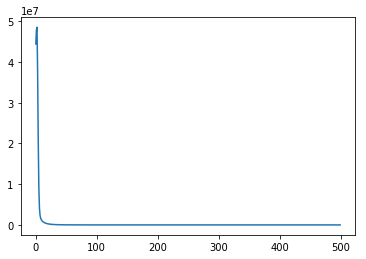

In [29]:
import numpy as np
import matplotlib.pyplot as plt

N, D_in, H, D_out = 64, 1000, 100, 10 # batch size, input dimention, hidden dimension, output dimension

# random data
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# randomly initialize weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
epochs = 500
loss_hist = []

for t in range(epochs):
    
    # Forward pass, compute predicted y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    loss_hist.append(loss)
    if((t % int(epochs / 20) == 0) or (t == epochs - 1)):
        print(t, loss)
    
    # Backpropagate to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # Update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    

plt.plot(loss_hist)

### PyTorch: Tensors

0 31198140.0
25 118572.7109375
50 12229.8466796875
75 2058.0869140625
100 427.570068359375
125 100.53970336914062
150 25.708616256713867
175 6.990397930145264
200 1.9930243492126465
225 0.5899446606636047
250 0.18002745509147644
275 0.05636105313897133
300 0.018134744837880135
325 0.006080775521695614
350 0.002205168828368187
375 0.0009045268525369465
400 0.0004276070976629853
425 0.00022784450266044587
450 0.00013541056250687689
475 8.800836076261476e-05
499 6.091410614317283e-05


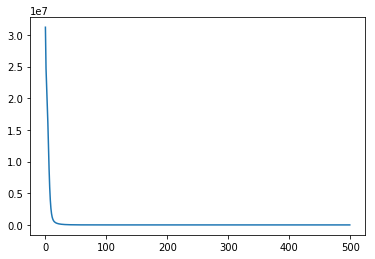

In [28]:
import torch


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)

learning_rate = 1e-6
epochs = 500
loss_hist = []

for t in range(500):
    # Forward pass: compute predicted y
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum().item()
    loss_hist.append(loss)
    if((t % int(epochs / 20) == 0) or (t == epochs - 1)):
        print(t, loss)

    # Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

import matplotlib.pyplot as plt
plt.plot(loss_hist)

### PyTorch: Tensors + Autograd

0 44472136.0
25 131331.875
50 14040.32421875
75 2264.096435546875
100 432.09539794921875
125 90.30301666259766
150 20.014192581176758
175 4.637523651123047
200 1.1164231300354004
225 0.27844518423080444
250 0.07175397127866745
275 0.019116126000881195
300 0.005393320694565773
325 0.001708350027911365
350 0.0006509763188660145
375 0.00029688471113331616
400 0.00015605968656018376
425 9.401683928444982e-05
450 6.215245230123401e-05
475 4.443662692210637e-05
499 3.399592242203653e-05


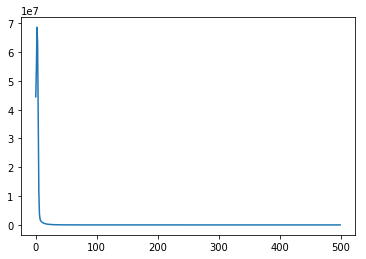

In [30]:
import torch

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
# Setting requires_grad=False indicates that we do not need to compute gradients
# with respect to these Tensors during the backward pass.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
epochs = 500
loss_hist = []

for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors; these
    # are exactly the same operations we used to compute the forward pass using
    # Tensors, but we do not need to keep references to intermediate values since
    # we are not implementing the backward pass by hand.
    y_pred = x.mm(w1).clamp(min=0).mm(w2)

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the a scalar value held in the loss.
    loss = (y_pred - y).pow(2).sum()
    loss_hist.append(loss.item())
    
    if((t % int(epochs / 20) == 0) or (t == epochs - 1)):
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call w1.grad and w2.grad will be Tensors holding the gradient
    # of the loss with respect to w1 and w2 respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    # An alternative way is to operate on weight.data and weight.grad.data.
    # Recall that tensor.data gives a tensor that shares the storage with
    # tensor, but doesn't track history.
    # You can also use torch.optim.SGD to achieve this.
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()
        
import matplotlib.pyplot as plt
plt.plot(loss_hist)

### PyTorch: defining new autograd functions

In [31]:
import torch


class MyReLU(torch.autograd.Function):
    """
    We can implement our own custom autograd Functions by subclassing
    torch.autograd.Function and implementing the forward and backward passes
    which operate on Tensors.
    """

    @staticmethod
    def forward(ctx, input):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold input and outputs.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Create random Tensors for weights.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    # To apply our Function, we use Function.apply method. We alias this as 'relu'.
    relu = MyReLU.apply

    # Forward pass: compute predicted y using operations; we compute
    # ReLU using our custom autograd operation.
    y_pred = relu(x.mm(w1)).mm(w2)

    # Compute and print loss
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())

    # Use autograd to compute the backward pass.
    loss.backward()

    # Update weights using gradient descent
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 37394596.0
1 32012666.0
2 27017928.0
3 20254894.0
4 13264964.0
5 7928169.5
6 4667368.5
7 2889203.0
8 1941518.0
9 1413363.5
10 1093473.75
11 880610.9375
12 727821.875
13 611641.75
14 519720.4375
15 445239.5
16 383911.4375
17 332892.46875
18 290045.21875
19 253770.578125
20 222884.921875
21 196428.0
22 173680.96875
23 154044.46875
24 137009.4375
25 122180.8671875
26 109226.8125
27 97870.234375
28 87894.28125
29 79095.8671875
30 71308.984375
31 64405.51953125
32 58266.80859375
33 52794.98046875
34 47909.3046875
35 43548.421875
36 39635.34375
37 36119.1796875
38 32954.203125
39 30100.345703125
40 27527.109375
41 25202.841796875
42 23098.87890625
43 21188.86328125
44 19454.4140625
45 17875.005859375
46 16436.328125
47 15124.3916015625
48 13926.9951171875
49 12833.5009765625
50 11833.205078125
51 10916.8505859375
52 10077.3740234375
53 9307.3916015625
54 8600.8828125
55 7951.8935546875
56 7355.91162109375
57 6808.314453125
58 6304.1220703125
59 5839.833984375
60 5411.86669921875
61 5017.32

416 7.365777855738997e-05
417 7.255570380948484e-05
418 7.128756260499358e-05
419 6.996289448579773e-05
420 6.88970903865993e-05
421 6.772727647330612e-05
422 6.662950181635097e-05
423 6.57440978102386e-05
424 6.473732355516404e-05
425 6.396407843567431e-05
426 6.30118593107909e-05
427 6.226265395525843e-05
428 6.143224163679406e-05
429 6.037438288331032e-05
430 5.953611253062263e-05
431 5.866761057404801e-05
432 5.770148345618509e-05
433 5.6726323236944154e-05
434 5.607409548247233e-05
435 5.521516504813917e-05
436 5.431117824628018e-05
437 5.332955697667785e-05
438 5.282821803120896e-05
439 5.193217657506466e-05
440 5.119829438626766e-05
441 5.038919334765524e-05
442 4.967813947587274e-05
443 4.906418325845152e-05
444 4.850769983022474e-05
445 4.768682993017137e-05
446 4.705613537225872e-05
447 4.663550134864636e-05
448 4.5819204387953505e-05
449 4.533110768534243e-05
450 4.4580374378710985e-05
451 4.406848893268034e-05
452 4.350145172793418e-05
453 4.303167588659562e-05
454 4.238610

### TensorFlow Static Graphs

In [35]:
import tensorflow as tf
import numpy as np

# First we set up the computational graph:

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create placeholders for the input and target data; these will be filled
# with real data when we execute the graph.
x = tf.placeholder(tf.float32, shape=(None, D_in))
y = tf.placeholder(tf.float32, shape=(None, D_out))

# Create Variables for the weights and initialize them with random data.
# A TensorFlow Variable persists its value across executions of the graph.
w1 = tf.Variable(tf.random_normal((D_in, H)))
w2 = tf.Variable(tf.random_normal((H, D_out)))

# Forward pass: Compute the predicted y using operations on TensorFlow Tensors.
# Note that this code does not actually perform any numeric operations; it
# merely sets up the computational graph that we will later execute.
h = tf.matmul(x, w1)
h_relu = tf.maximum(h, tf.zeros(1))
y_pred = tf.matmul(h_relu, w2)

# Compute loss using operations on TensorFlow Tensors
loss = tf.reduce_sum((y - y_pred) ** 2.0)

# Compute gradient of the loss with respect to w1 and w2.
grad_w1, grad_w2 = tf.gradients(loss, [w1, w2])

# Update the weights using gradient descent. To actually update the weights
# we need to evaluate new_w1 and new_w2 when executing the graph. Note that
# in TensorFlow the the act of updating the value of the weights is part of
# the computational graph; in PyTorch this happens outside the computational
# graph.
learning_rate = 1e-6
new_w1 = w1.assign(w1 - learning_rate * grad_w1)
new_w2 = w2.assign(w2 - learning_rate * grad_w2)

# Now we have built our computational graph, so we enter a TensorFlow session to
# actually execute the graph.
with tf.Session() as sess:
    # Run the graph once to initialize the Variables w1 and w2.
    sess.run(tf.global_variables_initializer())

    # Create numpy arrays holding the actual data for the inputs x and targets
    # y
    x_value = np.random.randn(N, D_in)
    y_value = np.random.randn(N, D_out)
    for _ in range(500):
        # Execute the graph many times. Each time it executes we want to bind
        # x_value to x and y_value to y, specified with the feed_dict argument.
        # Each time we execute the graph we want to compute the values for loss,
        # new_w1, and new_w2; the values of these Tensors are returned as numpy
        # arrays.
        loss_value, _, _ = sess.run([loss, new_w1, new_w2],
                                    feed_dict={x: x_value, y: y_value})
        print(loss_value)

30554260.0
25483444.0
28399706.0
34741280.0
39098256.0
35523920.0
24065392.0
12302700.0
5406733.0
2475914.5
1355495.6
901091.56
682850.75
553482.2
463504.38
394736.72
339562.88
294124.8
256192.06
224230.89
197095.02
173931.47
154036.6
136893.64
122050.95
109133.6
97839.11
87943.61
79247.05
71565.1
64765.305
58741.22
53377.5
48585.543
44293.78
40443.195
36979.977
33859.82
31043.506
28496.11
26186.61
24090.516
22185.402
20450.262
18868.361
17423.848
16103.622
14895.441
13787.817
12772.291
11839.862
10982.963
10194.597
9468.566
8799.514
8182.6167
7613.431
7087.6895
6601.4463
6151.7637
5735.566
5350.1494
4992.8687
4661.558
4354.0664
4068.6174
3803.51
3557.0098
3327.888
3114.6682
2916.0757
2731.213
2558.9053
2398.3452
2248.6113
2108.901
1978.5516
1856.825
1743.121
1636.9106
1537.5901
1444.7277
1357.9116
1276.635
1200.5493
1129.3157
1062.5747
1000.0464
941.46265
886.52594
834.9819
786.6396
741.26465
698.6942
658.7159
621.14966
585.8615
552.7162
521.5661
492.27808
464.73645
438.82587
414.4452

### Pytorch: nn

0 627.8900756835938
1 577.7265625
2 535.0880126953125
3 498.27130126953125
4 466.14117431640625
5 437.80810546875
6 412.19891357421875
7 388.9004211425781
8 367.4820556640625
9 347.6282653808594
10 329.0393371582031
11 311.60601806640625
12 295.2670593261719
13 279.8604431152344
14 265.3123474121094
15 251.4831085205078
16 238.4127197265625
17 225.9990997314453
18 214.17442321777344
19 202.8619842529297
20 192.1005096435547
21 181.92410278320312
22 172.25599670410156
23 163.03225708007812
24 154.25685119628906
25 145.8988037109375
26 137.97152709960938
27 130.43919372558594
28 123.2934341430664
29 116.52894592285156
30 110.04866027832031
31 103.91651153564453
32 98.11100006103516
33 92.61210632324219
34 87.42656707763672
35 82.53783416748047
36 77.91059112548828
37 73.54826354980469
38 69.4356918334961
39 65.55902099609375
40 61.897850036621094
41 58.4463996887207
42 55.202842712402344
43 52.14497375488281
44 49.26659393310547
45 46.55435562133789
46 43.999290466308594
47 41.5966682434

494 2.1705773178837262e-05
495 2.1170868421904743e-05
496 2.0648856661864556e-05
497 2.014114215853624e-05
498 1.9643886844278313e-05
499 1.9159944713464938e-05
tensor([[-0.0469, -1.4460,  1.6505,  ..., -1.6619,  0.3912,  1.6060],
        [-0.7922,  0.7694,  0.8478,  ...,  0.4976, -0.8209,  0.3925],
        [ 1.4101, -0.4991,  1.4982,  ..., -1.4702,  0.0534,  1.3295],
        ...,
        [ 0.0446,  0.8502,  0.3841,  ...,  0.9606,  0.5983,  2.1325],
        [ 1.3304, -1.5785, -0.5537,  ..., -0.3738, -1.1189, -0.9541],
        [ 2.1356, -0.0207,  1.0926,  ...,  0.0489,  1.2315, -1.4056]])


/home/ryan/work/bfpytorch/venv/lib/python3.6/site-packages/matplotlib/axes/_base.py:380: MatplotlibDeprecationWarning: 
cycling among columns of inputs with non-matching shapes is deprecated.
  cbook.warn_deprecated("2.2", "cycling among columns of inputs "


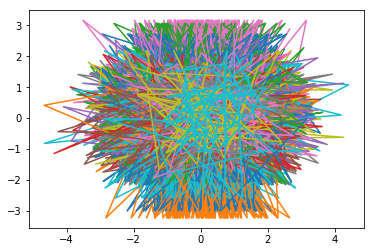

In [19]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            


# HOW DO I PLOT ACTUAL VERSUS PREDICTED? NEED A CLEANER ACTUAL?
import matplotlib.pyplot as plt

print(x)

plt.plot(x.numpy(), y.squeeze().numpy())

### Pytorch: optim

In [20]:
import torch

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0 674.7962646484375
1 657.6285400390625
2 640.9048461914062
3 624.6702880859375
4 608.942626953125
5 593.7808837890625
6 579.0921630859375
7 564.8495483398438
8 550.9631958007812
9 537.5364379882812
10 524.4998168945312
11 511.8165283203125
12 499.4808654785156
13 487.4749450683594
14 475.8285217285156
15 464.4976806640625
16 453.5180358886719
17 442.9429931640625
18 432.67449951171875
19 422.70013427734375
20 413.0518493652344
21 403.6492919921875
22 394.5124816894531
23 385.6004943847656
24 376.9169006347656
25 368.4826354980469
26 360.2330627441406
27 352.20758056640625
28 344.3843078613281
29 336.7702331542969
30 329.3376770019531
31 322.0560607910156
32 314.9342346191406
33 307.9677734375
34 301.1548767089844
35 294.5063171386719
36 288.0082092285156
37 281.6441955566406
38 275.4043884277344
39 269.3090515136719
40 263.351318359375
41 257.496337890625
42 251.7327117919922
43 246.08946228027344
44 240.57321166992188
45 235.17626953125
46 229.890869140625
47 224.7002716064453
48 219

376 6.241610390134156e-05
377 5.875499118701555e-05
378 5.530562702915631e-05
379 5.205288471188396e-05
380 4.898672705166973e-05
381 4.609854659065604e-05
382 4.33751119999215e-05
383 4.0809372876537964e-05
384 3.839059718302451e-05
385 3.6112440284341574e-05
386 3.396631291252561e-05
387 3.194613600498997e-05
388 3.0043316655792296e-05
389 2.8252457923372276e-05
390 2.6563518986222334e-05
391 2.4972376195364632e-05
392 2.3478889488615096e-05
393 2.2069452825235203e-05
394 2.0744009816553444e-05
395 1.949549186974764e-05
396 1.832212547014933e-05
397 1.7216178093804047e-05
398 1.617577981960494e-05
399 1.5196486856439151e-05
400 1.4276758520281874e-05
401 1.3409612620307598e-05
402 1.259531836694805e-05
403 1.1829908544314094e-05
404 1.1108556464023422e-05
405 1.0431367627461441e-05
406 9.794421202968806e-06
407 9.195169695885852e-06
408 8.632389835838694e-06
409 8.102770152618177e-06
410 7.605586233694339e-06
411 7.137537977541797e-06
412 6.697937351418659e-06
413 6.284764822339639e-

### Pytorch: Custom nn Modules

In [30]:
import torch


class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
#optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 727.228759765625
1 709.0496215820312
2 691.4689331054688
3 674.3672485351562
4 657.7843627929688
5 641.6527099609375
6 625.9937133789062
7 610.7522583007812
8 595.8395385742188
9 581.3256225585938
10 567.21484375
11 553.4645385742188
12 540.129150390625
13 527.1876831054688
14 514.6436767578125
15 502.4920959472656
16 490.65850830078125
17 479.13726806640625
18 467.9301452636719
19 457.1448669433594
20 446.573486328125
21 436.2127990722656
22 426.1431579589844
23 416.3294372558594
24 406.7297668457031
25 397.378173828125
26 388.27459716796875
27 379.4125061035156
28 370.7857360839844
29 362.3345031738281
30 354.1154479980469
31 346.06878662109375
32 338.17974853515625
33 330.46270751953125
34 322.89642333984375
35 315.4877624511719
36 308.26580810546875
37 301.19952392578125
38 294.26409912109375
39 287.5232238769531
40 280.93157958984375
41 274.4910583496094
42 268.1766357421875
43 261.9965515136719
44 255.94190979003906
45 250.01162719726562
46 244.1927032470703
47 238.485977172851

401 0.00010562035458860919
402 0.00010073848534375429
403 9.607724496163428e-05
404 9.162999776890501e-05
405 8.738074393477291e-05
406 8.33217054605484e-05
407 7.945307879708707e-05
408 7.575880590593442e-05
409 7.222414569696411e-05
410 6.885547918500379e-05
411 6.56404226901941e-05
412 6.256924098124728e-05
413 5.963768853689544e-05
414 5.684318966814317e-05
415 5.417368811322376e-05
416 5.1626309868879616e-05
417 4.9199064960703254e-05
418 4.688032640842721e-05
419 4.4666347093880177e-05
420 4.255735984770581e-05
421 4.054349847137928e-05
422 3.861857112497091e-05
423 3.678822758956812e-05
424 3.5042819945374504e-05
425 3.337369344080798e-05
426 3.1783460144652054e-05
427 3.0268176487879828e-05
428 2.8821366868214682e-05
429 2.7442760256235488e-05
430 2.612687421787996e-05
431 2.487323399691377e-05
432 2.3678787329117768e-05
433 2.2540887584909797e-05
434 2.145340658898931e-05
435 2.041827428911347e-05
436 1.942937342391815e-05
437 1.8490090951672755e-05
438 1.7593705706531182e-05


### Pytorch: Control Flow and Weight Sharing

In [32]:
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 0, 1, 2, or 3
        and reuse the middle_linear Module that many times to compute hidden layer
        representations.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same Module many
        times when defining a computational graph. This is a big improvement from Lua
        Torch, where each Module could be used only once.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 747.3974609375
1 683.9229736328125
2 681.5201416015625
3 688.0658569335938
4 680.12353515625
5 545.27880859375
6 677.291015625
7 457.3083801269531
8 406.4618225097656
9 349.3304443359375
10 669.608642578125
11 673.9999389648438
12 673.3783569335938
13 664.2652587890625
14 665.8555297851562
15 156.927001953125
16 640.3921508789062
17 121.3222427368164
18 589.5454711914062
19 642.2097778320312
20 633.4466552734375
21 491.8781433105469
22 89.9130630493164
23 589.5023803710938
24 88.6959228515625
25 548.5975952148438
26 618.433837890625
27 598.0717163085938
28 459.6757507324219
29 422.0461730957031
30 495.1336975097656
31 449.79058837890625
32 406.83612060546875
33 312.8992614746094
34 163.7481689453125
35 299.9678039550781
36 115.72624206542969
37 366.7006530761719
38 71.48994445800781
39 506.26593017578125
40 165.6927490234375
41 226.45339965820312
42 111.4625473022461
43 114.99786376953125
44 246.17880249023438
45 398.44317626953125
46 306.7913513183594
47 296.9679870605469
48 411.625

467 0.9740130305290222
468 0.6068877577781677
469 0.49262675642967224
470 0.9104967713356018
471 0.46421363949775696
472 0.40680158138275146
473 0.4206867218017578
474 0.22910836338996887
475 0.5797138214111328
476 0.51728755235672
477 0.33203789591789246
478 0.22705109417438507
479 0.407429575920105
480 0.4619787335395813
481 0.28154119849205017
482 0.2549285292625427
483 0.5875340104103088
484 1.5572168827056885
485 0.21925944089889526
486 0.38495752215385437
487 0.5873184204101562
488 1.4333795309066772
489 0.40861013531684875
490 0.3499240279197693
491 0.08523137122392654
492 0.09435145556926727
493 0.10228399187326431
494 3.0649936199188232
495 0.5665075182914734
496 0.3084048628807068
497 0.25519073009490967
498 3.97798228263855
499 0.7844688892364502
